# Medical Compliance Forecasting

## Objective: To predict patients likelihood of adherence to a prescribed regimen

###  ** Data: ** 
Data has Patient details such as Age, Gender, Diabetes along with the target variable 'Adherence' Yes: If patient has adhered to regimen, No: Not adhered to regimen. Data is split in training and test datasets.

### ** Evaluation: ** For each patient id in test set, we must predict if patient is going to adhere to the prescribed regimen. The model will be evaluated on precision and recall for both the outcomes. 

### ** Approach: ** 
**1. Data Preparation:**

   a. Label encoding for string variables
   
   b. Check for and handle missing values
   
   c. Check for and handle outliers
   
   d. Check for and handle duplicates


**2. Exploring the Data:**

   a. Relationship between target and predictor variables
   
   b. Checking normality
   
   c. Checking correlation
   
   d. Checking class balance
   
**3. Data Preprocessing:**

   a. Normalising
   
   b. Feature Selection - Reduction
   
   c. Split train-validate-test
   
**4. Training the Model: Learning & Evaluation:**

   a. Logistic Regression
   
   b. Decision Trees
   
   c. Random Forest
   
   d. SVM
   
**5. Prediction:**

   a. Best Model Fit
   
   b. Output desired csv

# 1. Data Preparation

In [1]:
#Import packages
import pandas as pd
from numpy import *
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import scipy
import scipy.stats as stats
import pylab as pl
import seaborn as sns
sns.set(style = "whitegrid", color_codes = True)
#np.random.seed(sum(map(ord, "palettes")))

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_context("poster")

In [2]:
# Grabbing the data
data = pd.read_csv("Training Data.csv", encoding ='latin1')
test_data = pd.read_csv("Test Data.csv", encoding ='latin1')
data_copy = data.copy()

In [3]:
# Snapshot of training data
data.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No


In [4]:
#Snapshot of testing data
test_data.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
0,1,5,M,28,0,0,0,0,0,1
1,2,62,F,9,1,0,1,0,0,0
2,3,4,F,73,0,0,0,0,0,1
3,4,33,M,117,0,0,0,0,0,0
4,5,38,M,8,0,0,0,0,0,1


** Note how there are few categorical fields which are strings, we will need to encode them to numeric. Also, the 'Adherence' field is missing from Test Data **

In [5]:
#Checking out unique values in each field
pd.Series({c: data[c].unique() for c in data})

Adherence                                                      [No, Yes]
Age                    [19, 24, 4, 38, 46, 20, 51, 58, 73, 48, 64, 5,...
Alcoholism                                                        [0, 1]
Diabetes                                                          [0, 1]
Gender                                                            [M, F]
HyperTension                                                      [0, 1]
Prescription_period    [7, 59, 43, 66, 98, 73, 102, 96, 89, 97, 77, 1...
Smokes                                                            [0, 1]
Sms_Reminder                                                   [0, 1, 2]
Tuberculosis                                                      [0, 1]
patient_id             [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dtype: object

### ** 1.a Label encoding for string variables **

In [6]:
#Training
# Only replace for the two string value variables
data['Adherence'] = np.where(data['Adherence'] == 'No',0, 1)
data['Gender'] = np.where(data['Gender'] == 'M',0,1)

In [7]:
#Test
# Only replace for the two string value variables
test_data['Gender'] = np.where(test_data['Gender'] == 'M',0,1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender                 180212 non-null int64
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null int64
dtypes: int64(11)
memory usage: 15.1 MB


### 1.b Missing Values

In [9]:
#training
data.isnull().values.any()

False

In [10]:
#test
test_data.isnull().values.any()

False

There are no missing values

### ** 1.c  Outliers **

Since there are only two continious fields we will check these for outliers only

In [11]:
#In Age
df2 = data.copy()
df2 = df2[((df2.Age - df2.Age.mean()) / df2.Age.std()).abs() < 3]
print("Rows in data:", data.patient_id.count())
print("Rows in df2:", df2.patient_id.count())
print("Outliers removed", 100.00-((df2.patient_id.count()/data.patient_id.count())*100))
del df2

Rows in data: 180212
Rows in df2: 180209
Outliers removed 0.00166470601292


In [12]:
# In Prescription Perion
df2 = data.copy()
df2 = df2[((df2.Prescription_period - df2.Prescription_period.mean()) / df2.Prescription_period.std()).abs() < 3]
print("Rows in data:", data.patient_id.count())
print("Rows in df2:", df2.patient_id.count())
print("Outliers removed", 100.00-((df2.patient_id.count()/data.patient_id.count())*100))
del df2

Rows in data: 180212
Rows in df2: 180212
Outliers removed 0.0


In [13]:
#Outliers are only existing in Age variable
#Since outliers are less than 1% we continue with the clean data
data = data[((data.Age - data.Age.mean()) / data.Age.std()).abs() < 3]
len(data)

180209

### ** 1.d  Duplicates **

In [14]:
data.duplicated().any()

False

In [15]:
test_data.duplicated().any()

False

There are no duplicates in the data

# 2. Exploring the Data

In [16]:
data.describe()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
count,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000
mean,90105.769135,37.794139,0.668307,54.668485,0.078525,0.025043,0.216510,0.052561,0.000338,0.573972,0.301811
std,52022.823660,22.850290,0.470823,35.752590,0.268997,0.156257,0.411867,0.223156,0.018395,0.499823,0.459045
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45053.000000,19.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90106.000000,38.000000,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,135158.000000,56.000000,1.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,180212.000000,104.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


### 2.a Relationship between target and predictor variables

In [17]:
data.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,0,7,0,0,0,0,0,0,0
1,2,24,1,59,0,0,0,0,0,0,0
2,3,4,1,43,0,0,0,0,0,0,0
3,4,38,0,66,0,0,0,0,0,1,0
4,5,46,1,98,0,0,0,0,0,1,0


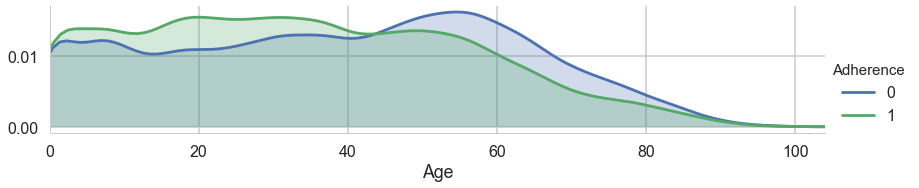

In [18]:

# distribution of age# distri 
facet = sns.FacetGrid(data, hue="Adherence",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.show()

In [19]:
# Checking out the size in groups for binary predictors
dlen = len(data)

print(data.groupby('Gender').size(), "Females are:", round((len(data[data['Gender'] == 0])/dlen)*100,2),"%" )
print(data.groupby('Diabetes').size(), "Diabetes patients are:", round((len(data[data['Diabetes'] == 1])/dlen)*100,2) ,"%")
print(data.groupby('Alcoholism').size(), "Alcoholics are:", round((len(data[data['Alcoholism'] == 1])/dlen)*100,2),"%" )
print(data.groupby('HyperTension').size(), "HyperTension patients are:", round((len(data[data['HyperTension'] == 1])/dlen)*100,2),"%" )
print(data.groupby('Smokes').size(), "Smokers are:", round((len(data[data['Smokes'] == 1])/dlen)*100,2),"%" )
print(data.groupby('Tuberculosis').size(), "Tuberculosis patients are:", round((len(data[data['Tuberculosis'] == 1])/dlen)*100,2),"%" )

Gender
0     59774
1    120435
dtype: int64 Females are: 33.17 %
Diabetes
0    166058
1     14151
dtype: int64 Diabetes patients are: 7.85 %
Alcoholism
0    175696
1      4513
dtype: int64 Alcoholics are: 2.5 %
HyperTension
0    141192
1     39017
dtype: int64 HyperTension patients are: 21.65 %
Smokes
0    170737
1      9472
dtype: int64 Smokers are: 5.26 %
Tuberculosis
0    180148
1        61
dtype: int64 Tuberculosis patients are: 0.03 %


There are very few Tuberculosis patients and alcoholics

### 2.a Checking normality

/Users/ruhama.ahale/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


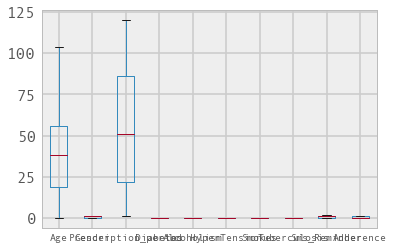

In [20]:
pd.options.display.mpl_style = 'default'
#cols =['Age','Prescription_period']
features = ['Age','Gender','Prescription_period','Diabetes','Alcoholism','HyperTension','Smokes','Tuberculosis','Sms_Reminder','Adherence'] 
data_var = data[features]
data_var.boxplot()

In [21]:
#Create a subset of data with only features to show coorrelation between features
features = data[['Age','Prescription_period','Sms_Reminder']]
series = features.values
scipy.stats.mstats.normaltest(series)

NormaltestResult(statistic=masked_array(data = [32375.641677179745 293716.19887388445 --],
             mask = [False False  True],
       fill_value = 1e+20)
, pvalue=array([ 0.,  0.,  0.]))

Hence, we will need to normalize the data

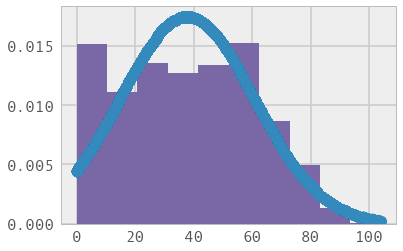

In [22]:

h = sorted(data['Age'])  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show()     

### 2.a Checking correlation

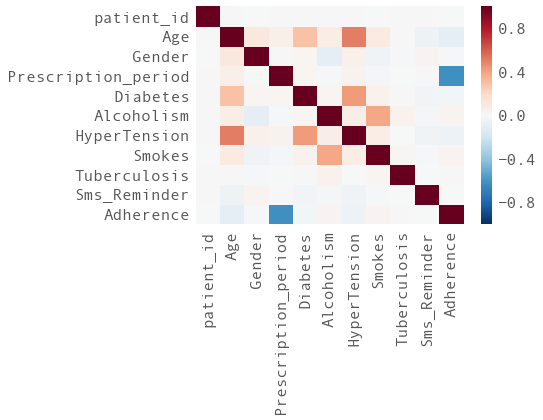

In [23]:
sns.heatmap(data.corr())
plt.show()

As we can see, there is some multicollinearity between Age-Hypertension, Diabetes-Age/Hypertension, Alcoholism-Smokes and such

### 2.a Checking class balance

In [24]:
print(data.shape)
print(test_data.shape)

(180209, 11)
(119788, 10)


In [25]:
print(data.groupby('Adherence').size())

Adherence
0    125820
1     54389
dtype: int64


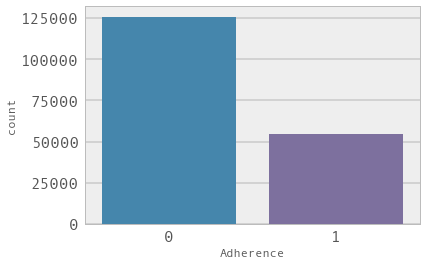

In [26]:
#import seaborn as sns
sns.countplot(data['Adherence'],label="Count")
plt.show()

In [27]:
#Do we need to balance the data?
print("Proportion of 0:", round((125820/dlen)*100,2))
print("Proportion of 1:", round((54389/dlen)*100,2))

Proportion of 0: 69.82
Proportion of 1: 30.18


Here we can see that 30.18% of the data has Adhered to the prescription, this is a good enough amount of data for us to model on, so we will not consider the data inbalanced.

# 3. Data Preprocessing

### 3.a Normalising

** Training **

In [28]:
data.Gender = data.Gender.astype(float)
data.Diabetes = data.Diabetes.astype(float)
data.Alcoholism = data.Alcoholism.astype(float)
data.HyperTension = data.HyperTension.astype(float)
data.Smokes = data.Smokes.astype(float)
data.Tuberculosis = data.Tuberculosis.astype(float)


for item in data: #converts everything to floats
    data[item] = pd.to_numeric(data[item])

def normalize(data, toNormalize): #normalizes 
    result = data.copy()
    for item in data.columns:
        if (item in toNormalize):
            max_value = data[item].max()
            min_value = data[item].min()
            result[item] = (data[item] - min_value) / (max_value - min_value)
    return result
toNormalize = ['Age', 'Prescription_period', 'Sms_Reminder'] #columns to normalize
data = normalize(data, toNormalize)
#data = data.dropna()
print(len(data))
data.head()

180209


,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,0.182692,0.0,0.050420,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,0.230769,1.0,0.487395,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,0.038462,1.0,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,0.365385,0.0,0.546218,0.0,0.0,0.0,0.0,0.0,0.5,0
4,5,0.442308,1.0,0.815126,0.0,0.0,0.0,0.0,0.0,0.5,0


/Users/ruhama.ahale/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


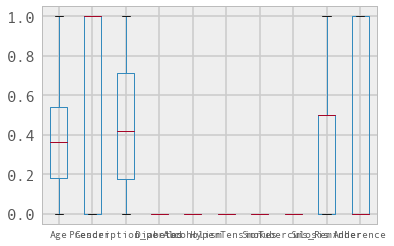

In [29]:
pd.options.display.mpl_style = 'default'
#cols =['Age','Prescription_period']
features = ['Age','Gender','Prescription_period','Diabetes','Alcoholism','HyperTension','Smokes','Tuberculosis','Sms_Reminder','Adherence'] 
data_var = data[features]
data_var.boxplot()

** Testing **

In [30]:
test_data.Gender = test_data.Gender.astype(float)
test_data.Diabetes = test_data.Diabetes.astype(float)
test_data.Alcoholism = test_data.Alcoholism.astype(float)
test_data.HyperTension = test_data.HyperTension.astype(float)
test_data.Smokes = test_data.Smokes.astype(float)
test_data.Tuberculosis = test_data.Tuberculosis.astype(float)


for item in test_data: #converts everything to floats
    test_data[item] = pd.to_numeric(test_data[item])

def normalize(data, toNormalize): #normalizes 
    result = data.copy()
    for item in data.columns:
        if (item in toNormalize):
            max_value = data[item].max()
            min_value = data[item].min()
            result[item] = (data[item] - min_value) / (max_value - min_value)
    return result
toNormalize = ['Age', 'Prescription_period', 'Sms_Reminder'] #columns to normalize
test_data = normalize(test_data, toNormalize)
#data = data.dropna()
print(len(test_data))
test_data.head()

119788


,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
0,1,0.044248,0.0,0.226891,0.0,0.0,0.0,0.0,0.0,0.5
1,2,0.548673,1.0,0.067227,1.0,0.0,1.0,0.0,0.0,0.0
2,3,0.035398,1.0,0.605042,0.0,0.0,0.0,0.0,0.0,0.5
3,4,0.292035,0.0,0.974790,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.336283,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.5


/Users/ruhama.ahale/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


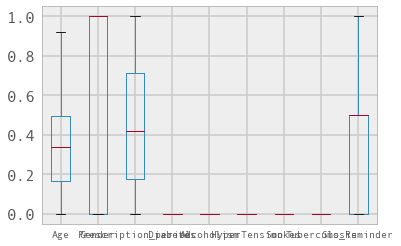

In [31]:
pd.options.display.mpl_style = 'default'
#cols =['Age','Prescription_period']
features = ['Age','Gender','Prescription_period','Diabetes','Alcoholism','HyperTension','Smokes','Tuberculosis','Sms_Reminder'] 
data_var = test_data[features]
data_var.boxplot()

In [32]:
fixed_train = data.copy()
fixed_test = test_data.copy()

### ** 3.b Feature Selection**

Since there are only 10 predictors in the variable, we do not want to exclude any features as that could lead to loss of information. Instead, we will try to handle this in the model

### ** 3.c Split Train-Validation-Test**

In [33]:
#logistic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision tree
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.grid_search import GridSearchCV

/Users/ruhama.ahale/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ruhama.ahale/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [34]:
df = data.copy()
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,0.182692,0.0,0.050420,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.230769,1.0,0.487395,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.038462,1.0,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.365385,0.0,0.546218,0.0,0.0,0.0,0.0,0.0,0.5,0
4,0.442308,1.0,0.815126,0.0,0.0,0.0,0.0,0.0,0.5,0


In [35]:
test_df = test_data.copy()
test_df.drop(test_df.columns[0], axis=1, inplace=True)
test_df.head()

,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
0,0.044248,0.0,0.226891,0.0,0.0,0.0,0.0,0.0,0.5
1,0.548673,1.0,0.067227,1.0,0.0,1.0,0.0,0.0,0.0
2,0.035398,1.0,0.605042,0.0,0.0,0.0,0.0,0.0,0.5
3,0.292035,0.0,0.974790,0.0,0.0,0.0,0.0,0.0,0.0
4,0.336283,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.5


In [36]:
train, val = train_test_split(df, test_size=0.2)
X_train = train.ix[:,0:9]
y_train = train.ix[:,-1]
y_train_df = pd.DataFrame(y_train)
X_val = val.ix[:,0:9]
y_val = val.ix[:,-1]
y_val_df = pd.DataFrame(y_val)


In [37]:
val_len = len(X_val)
print(val_len)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

36042
(144167, 9)
(36042, 9)
(144167,)
(36042,)


In [38]:
test_df.shape

(119788, 9)

In [39]:
train.shape

(144167, 10)

# 4. Training and Evaluating the model

In [40]:
#defining the function to calculate precision recall
def precision_recall(TP, FP, FN, TN, c):
    if c == 'PY':
        score = TP/(TP+FP)
    elif c == 'RY':
        score = TP/(TP+FN)
    elif c == 'PN':
        score = TN/(TN+FN)
    elif c == 'RN':
        score = TN/(TN+FP)
    return(score)

### ** 4.a Logistic Regression **

In [41]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train.values)


prediction = logreg.predict(X_val)
print('The accuracy of Logistic Regression is: ', round(accuracy_score(y_val, prediction)*100,2),"%")

print(classification_report(y_val.values, prediction))
cm = confusion_matrix(y_val.values, prediction)
print(cm)


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]


print("Precision for Yes is :", round(precision_recall(TP, FP, FN, TN, 'PY')*100,2), "%")
print("Recall for Yes is :", round(precision_recall(TP, FP, FN, TN, 'RY')*100,2), "%")
print("Precision for No is :", round(precision_recall(TP, FP, FN, TN, 'PN')*100,2), "%")
print("Recall for No is :", round(precision_recall(TP, FP, FN, TN, 'RN')*100,2), "%")

print("The result is telling us that we have", TP+TN, "(", round(((TP+TN)/val_len)*100,2),"%)", "correct predictions and", FP+FN ,  "(", round(((FP+FN)/val_len)*100,2),"%)", "incorrect predictions.")  



The accuracy of Logistic Regression is:  87.77 %
             precision    recall  f1-score   support

          0       0.92      0.90      0.91     25128
          1       0.79      0.82      0.80     10914

avg / total       0.88      0.88      0.88     36042

[[22717  2411]
 [ 1996  8918]]
Precision for Yes is : 90.41 %
Recall for Yes is : 91.92 %
Precision for No is : 81.71 %
Recall for No is : 78.72 %
The result is telling us that we have 31635 ( 87.77 %) correct predictions and 4407 ( 12.23 %) incorrect predictions.


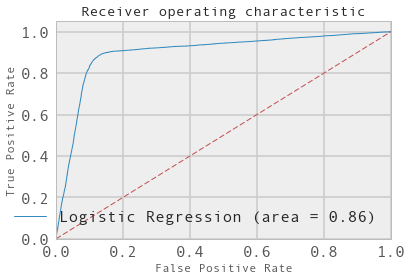

In [42]:
#roc curve

logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## ** For Logistic regression, the f-score is 88% **

### 4.b. Decision Trees

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train.values)
prediction = model.predict(X_val)
print('The accuracy of Decision Tree is: ', round(accuracy_score(y_val, prediction)*100,2), "%") 

print(classification_report(y_val.values, prediction))
cm = confusion_matrix(y_val.values, prediction)
print(cm)


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]


print("Precision for Yes is :", round(precision_recall(TP, FP, FN, TN, 'PY')*100,2), "%")
print("Recall for Yes is :", round(precision_recall(TP, FP, FN, TN, 'RY')*100,2), "%")
print("Precision for No is :", round(precision_recall(TP, FP, FN, TN, 'PN')*100,2), "%")
print("Recall for No is :", round(precision_recall(TP, FP, FN, TN, 'RN')*100,2), "%")

print("The result is telling us that we have", TP+TN, "(", round(((TP+TN)/val_len)*100,2),"%)", "correct predictions and", FP+FN ,  "(", round(((FP+FN)/val_len)*100,2),"%)", "incorrect predictions.")

The accuracy of Decision Tree is:  85.32 %
             precision    recall  f1-score   support

          0       0.89      0.90      0.89     25128
          1       0.76      0.75      0.76     10914

avg / total       0.85      0.85      0.85     36042

[[22540  2588]
 [ 2704  8210]]
Precision for Yes is : 89.7 %
Recall for Yes is : 89.29 %
Precision for No is : 75.22 %
Recall for No is : 76.03 %
The result is telling us that we have 30750 ( 85.32 %) correct predictions and 5292 ( 14.68 %) incorrect predictions.


In [44]:
parameters={'min_samples_split' : list(range(10,500,20)),'max_depth': list(range(1,20,2))}
clf_t = DecisionTreeClassifier()
clf = GridSearchCV(clf_t,parameters)
clf.fit(X_train, y_train)
prediction = clf.predict(X_val)

print(classification_report(y_val.values, prediction))
cm = confusion_matrix(y_val, prediction)
print(cm)


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]


print("Precision for Yes is :", round(precision_recall(TP, FP, FN, TN, 'PY')*100,2), "%")
print("Recall for Yes is :", round(precision_recall(TP, FP, FN, TN, 'RY')*100,2), "%")
print("Precision for No is :", round(precision_recall(TP, FP, FN, TN, 'PN')*100,2), "%")
print("Recall for No is :", round(precision_recall(TP, FP, FN, TN, 'RN')*100,2), "%")

print("The result is telling us that we have", TP+TN, "(", round(((TP+TN)/val_len)*100,2),"%)", "correct predictions and", FP+FN ,  "(", round(((FP+FN)/val_len)*100,2),"%)", "incorrect predictions.")  



             precision    recall  f1-score   support

          0       0.95      0.89      0.92     25128
          1       0.78      0.89      0.83     10914

avg / total       0.90      0.89      0.89     36042

[[22435  2693]
 [ 1230  9684]]
Precision for Yes is : 89.28 %
Recall for Yes is : 94.8 %
Precision for No is : 88.73 %
Recall for No is : 78.24 %
The result is telling us that we have 32119 ( 89.12 %) correct predictions and 3923 ( 10.88 %) incorrect predictions.


## ** For Decision Tree, the f-score is 89% **

### 4.c Random Forest

In [45]:
# Load scikit's random forest classifier library
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


#took too long to run, didnt identify best params
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

In [46]:
# Create a random forest Classifier. By convention, model


model = RandomForestClassifier(n_jobs=-1, random_state=0)
model.fit(X_train, y_train.values)
prediction = model.predict(X_val)
print('The accuracy of RF classifier is: ', accuracy_score(y_val, prediction))

print(classification_report(y_val.values, prediction))
cm = confusion_matrix(y_val.values, prediction)
print(cm)


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]


print("Precision for Yes is :", round(precision_recall(TP, FP, FN, TN, 'PY')*100,2), "%")
print("Recall for Yes is :", round(precision_recall(TP, FP, FN, TN, 'RY')*100,2), "%")
print("Precision for No is :", round(precision_recall(TP, FP, FN, TN, 'PN')*100,2), "%")
print("Recall for No is :", round(precision_recall(TP, FP, FN, TN, 'RN')*100,2), "%")

print("The result is telling us that we have", TP+TN, "(", round(((TP+TN)/val_len)*100,2),"%)", "correct predictions and", FP+FN ,  "(", round(((FP+FN)/val_len)*100,2),"%)", "incorrect predictions.")  




The accuracy of RF classifier is:  0.86521280728
             precision    recall  f1-score   support

          0       0.91      0.90      0.90     25128
          1       0.77      0.80      0.78     10914

avg / total       0.87      0.87      0.87     36042

[[22492  2636]
 [ 2222  8692]]
Precision for Yes is : 89.51 %
Recall for Yes is : 91.01 %
Precision for No is : 79.64 %
Recall for No is : 76.73 %
The result is telling us that we have 31184 ( 86.52 %) correct predictions and 4858 ( 13.48 %) incorrect predictions.


## ** The f-score for random forest is 87% **

### 4.d. SVM

In [47]:
model=svm.SVC() #probability=True,cache_size=7000
model.fit(X_train,y_train) 
prediction=model.predict(X_val) 
print('The accuracy of the SVM is:',metrics.accuracy_score(y_val,prediction))


print(classification_report(y_val, prediction))
cm = confusion_matrix(y_val, prediction)
print(cm)


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]


The accuracy of the SVM is: 0.878475112369
             precision    recall  f1-score   support

          0       0.91      0.91      0.91     25128
          1       0.80      0.81      0.80     10914

avg / total       0.88      0.88      0.88     36042

[[22873  2255]
 [ 2125  8789]]


In [35]:
print("Precision for Yes is :", round(precision_recall(TP, FP, FN, TN, 'PY')*100,2), "%")
print("Recall for Yes is :", round(precision_recall(TP, FP, FN, TN, 'RY')*100,2), "%")
print("Precision for No is :", round(precision_recall(TP, FP, FN, TN, 'PN')*100,2), "%")
print("Recall for No is :", round(precision_recall(TP, FP, FN, TN, 'RN')*100,2), "%")

print("The result is telling us that we have", TP+TN, "(", round(((TP+TN)/val_len)*100,2),"%)", "correct predictions and", FP+FN ,  "(", round(((FP+FN)/val_len)*100,2),"%)", "incorrect predictions.") 


Precision for Yes is : 91.21 %
Recall for Yes is : 91.6 %
Precision for No is : 80.78 %
Recall for No is : 79.99 %
The result is telling us that we have 31734 ( 88.05 %) correct predictions and 4308 ( 11.95 %) incorrect predictions.


## The f-score for SVM is 88%

### could not identify best params as code took too long to run, hence commenting this
import time
#import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


start = time.time()
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, cache_size = 7000))
clf.fit(X_train, y_train)
end = time.time()
print("Single SVC", end - start, clf.score(y_val, prediction))
print(classification_report(y_val.values, prediction))
sproba = clf.predict_proba(test_df)


n_estimators = 10
start = time.time()
clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, cache_size = 7000), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(X_train, y_train)
end = time.time()
print("Bagging SVC", end - start, clf.score(y_val, prediction))
print(classification_report(y_val.values, prediction))
bproba = clf.predict_proba(test_df)


# 5. Prediction

## a. Best fit model

Comparing the f-scores for each of these models, we find that **'Decision Tree' ** is the best fitting model with highest f-score of 90%, hence, we use the predicted values calculated for it.

In [48]:
parameters={'min_samples_split' : list(range(10,500,20)),'max_depth': list(range(1,20,2))}
clf_t = DecisionTreeClassifier()
clf = GridSearchCV(clf_t,parameters)
clf.fit(X_train, y_train)
prediction = clf.predict(X_val)

print(classification_report(y_val.values, prediction))

cm = confusion_matrix(y_val, prediction)
print("The confusion matrix is:")
print(cm)


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]


print("Precision for Yes is :", round(precision_recall(TP, FP, FN, TN, 'PY')*100,2), "%")
print("Recall for Yes is :", round(precision_recall(TP, FP, FN, TN, 'RY')*100,2), "%")
print("Precision for No is :", round(precision_recall(TP, FP, FN, TN, 'PN')*100,2), "%")
print("Recall for No is :", round(precision_recall(TP, FP, FN, TN, 'RN')*100,2), "%")

print("The result is telling us that we have", TP+TN, "(", round(((TP+TN)/val_len)*100,2),"%)", "correct predictions and", FP+FN ,  "(", round(((FP+FN)/val_len)*100,2),"%)", "incorrect predictions.")  



             precision    recall  f1-score   support

          0       0.95      0.89      0.92     25128
          1       0.78      0.89      0.83     10914

avg / total       0.90      0.89      0.89     36042

The confusion matrix is:
[[22435  2693]
 [ 1230  9684]]
Precision for Yes is : 89.28 %
Recall for Yes is : 94.8 %
Precision for No is : 88.73 %
Recall for No is : 78.24 %
The result is telling us that we have 32119 ( 89.12 %) correct predictions and 3923 ( 10.88 %) incorrect predictions.


In [49]:
print("Before",test_data.head())
#test_data.drop(test_data[['t_predicted','probability']], axis=1, inplace=True)
prediction = clf.predict(test_df)
test_data['t_predicted'] = prediction
#test_data.head()
probability = clf.predict_proba(test_df)[:,1]
test_data['probability'] = probability
print("After:", test_data.head())

test_len = len(test_data)
print(test_data.groupby('t_predicted').size(), "Adhered are:", round((len(test_data[test_data['t_predicted'] == 1])/test_len)*100,2),"%" )   


Before    patient_id       Age  Gender  Prescription_period  Diabetes  Alcoholism  \
0           1  0.044248     0.0             0.226891       0.0         0.0   
1           2  0.548673     1.0             0.067227       1.0         0.0   
2           3  0.035398     1.0             0.605042       0.0         0.0   
3           4  0.292035     0.0             0.974790       0.0         0.0   
4           5  0.336283     0.0             0.058824       0.0         0.0   

   HyperTension  Smokes  Tuberculosis  Sms_Reminder  
0           0.0     0.0           0.0           0.5  
1           1.0     0.0           0.0           0.0  
2           0.0     0.0           0.0           0.5  
3           0.0     0.0           0.0           0.0  
4           0.0     0.0           0.0           0.5  
After:    patient_id       Age  Gender  Prescription_period  Diabetes  Alcoholism  \
0           1  0.044248     0.0             0.226891       0.0         0.0   
1           2  0.548673     1.0      

In [50]:
prediction_output = test_data[['patient_id','t_predicted','probability']]
prediction_output = prediction_output.rename(columns={'t_predicted':'adherence', 'probability':'probability_score'})
prediction_output.head()

,patient_id,adherence,probability_score
0,1,1,0.811887
1,2,1,0.763921
2,3,0,0.051298
3,4,0,0.060242
4,5,1,0.836200


## b. Output

In [51]:
prediction_output.to_csv('prediction_output.csv', sep=',')